In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [2]:
dir_path = 'PDHLockLongTermTrace/'

df = pd.read_csv(dir_path+'scope_0.csv')[1:]
df;

In [3]:
import re

csv_files = []

for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(file)

# Custom sorting key function
def sort_key(file_name):
    match = re.match(r'scope_(\d+)\.csv', file_name)
    return int(match.group(1)) if match else float('inf')

# Sort the csv_files list
csv_files.sort(key=sort_key)
csv_files;

In [4]:
# Initialize an empty list to store DataFrames
data_frames = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)[1:]
    data_frames.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
combined_df;

In [5]:
# ## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()

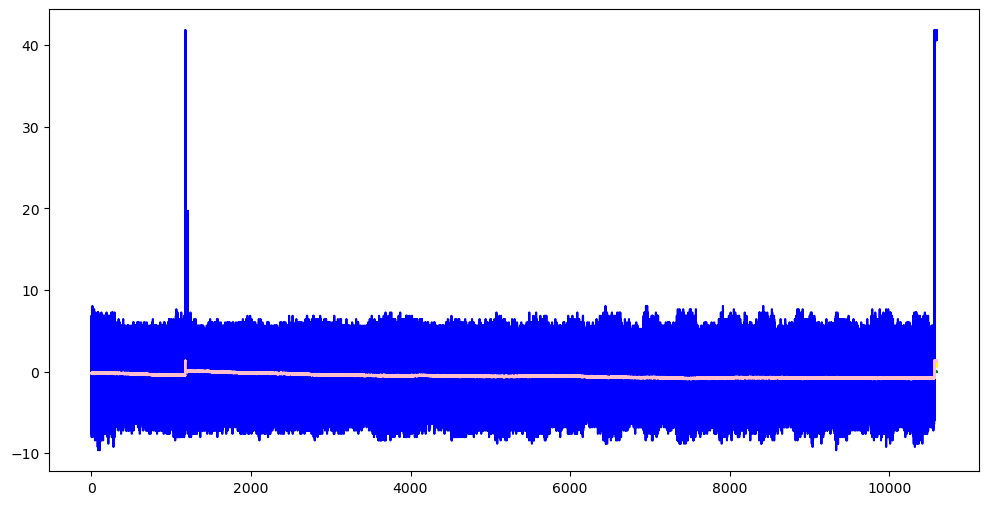

In [6]:
# Extract the data from the combined DataFrame and plot raw data

transmission_photodiode_raw = combined_df.iloc[:,1].astype(float)
error_signal_raw = combined_df.iloc[:,2].astype(float)
fast_out_raw = combined_df.iloc[:,3].astype(float)
slow_out_raw = combined_df.iloc[:,4].astype(float)
time_raw = np.arange(0, len(transmission_photodiode_raw)*0.008, 0.008)

plt.figure(figsize=(12, 6))
plt.plot(time_raw, transmission_photodiode_raw, color = 'yellow', label='Transmission Photodiode')
plt.plot(time_raw, error_signal_raw, color = 'green', label='Error Signal')
plt.plot(time_raw, fast_out_raw, color = 'blue', label='Fast Out')
plt.plot(time_raw, slow_out_raw, color = 'pink', label='Slow Out')

Text(0.5, 1.0, 'PDH Lock Long Term Trace')

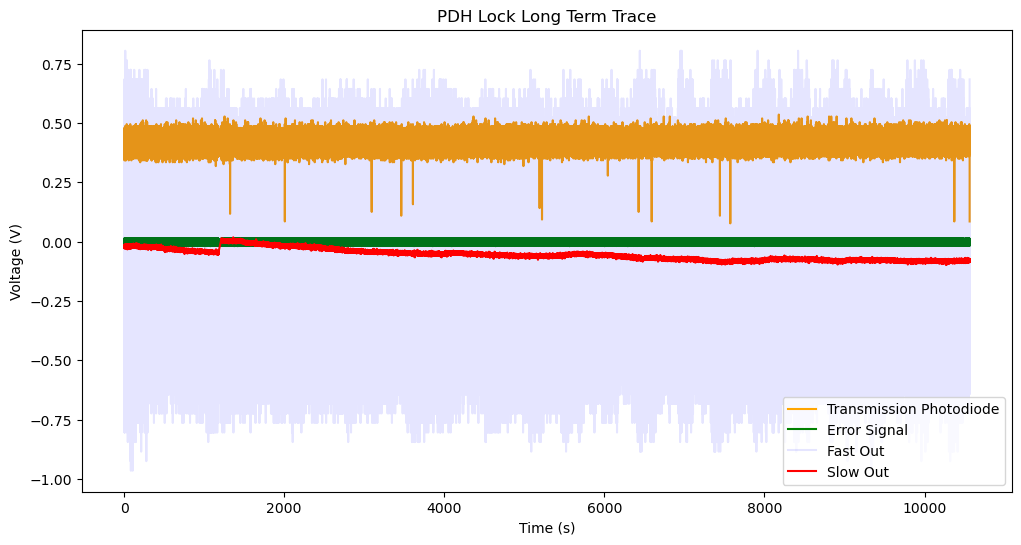

In [7]:
transmission_photodiode = combined_df.iloc[:,1].astype(float)[:1320455]
error_signal = combined_df.iloc[:,2].astype(float)[:1320455]
fast_out = combined_df.iloc[:,3].astype(float)[:1320455]
slow_out = combined_df.iloc[:,4].astype(float)[:1320455]
time = np.arange(0, len(transmission_photodiode)*0.008, 0.008)[:1320455]

fast_out_edited = fast_out.drop(index=range(147115,151196))
slow_out_edited = slow_out.drop(index=range(147115,151196))
error_signal_edited = error_signal.drop(index=range(147115,151196))
transmission_photodiode_edited = transmission_photodiode.drop(index=range(147115,151196))
time_edited = np.delete(time,range(147115,151196))

plt.figure(figsize=(12, 6))
plt.plot(time_edited, transmission_photodiode_edited/10, color = 'orange', label='Transmission Photodiode')
plt.plot(time_edited, error_signal_edited/10, color = 'green', label='Error Signal')
plt.plot(time_edited, fast_out_edited/10, color = 'blue', label='Fast Out',alpha=0.1)
plt.plot(time_edited, slow_out_edited/10, color = 'red', label='Slow Out')
plt.legend(loc='lower right')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('PDH Lock Long Term Trace')
# plt.savefig('PDH Lock Long Term Trace.pdf',dpi=1200)

In [8]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "crimson" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

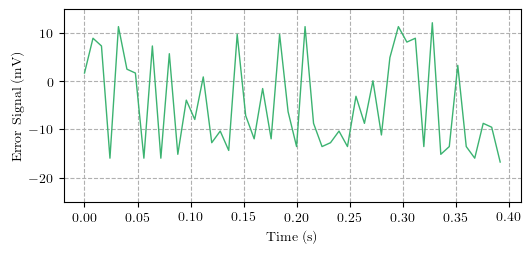

In [17]:
plt.plot(time_edited[:50],np.array(error_signal_edited*100)[:50],color='mediumseagreen')
plt.yticks([-20,-10,0,10])
plt.ylabel('Error Signal (mV)')
plt.ylim(-25,15)
plt.xlabel('Time (s)')
plt.savefig('250610 ErrorSignalZoomedInEvenFurther.pdf',dpi=300)

# 250520 Latex font for thesis

In [7]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

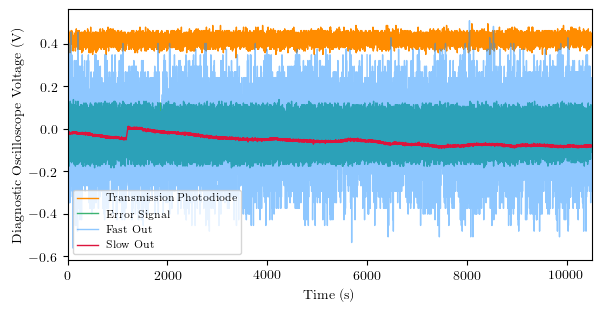

In [8]:
transmission_photodiode = combined_df.iloc[:,1].astype(float)[:1320455]
error_signal = combined_df.iloc[:,2].astype(float)[:1320455]
fast_out = combined_df.iloc[:,3].astype(float)[:1320455]
slow_out = combined_df.iloc[:,4].astype(float)[:1320455]
time = np.arange(0, len(transmission_photodiode)*0.008, 0.008)[:1320455]

fast_out_edited = fast_out.drop(index=range(147115,151196))/15
slow_out_edited = slow_out.drop(index=range(147115,151196))/10
error_signal_edited = error_signal.drop(index=range(147115,151196))
transmission_photodiode_edited = transmission_photodiode.drop(index=range(147115,151196))/10
time_edited = np.delete(time,range(147115,151196))

# plt.figure(figsize=(12, 6))
plt.plot(time_edited[::100], transmission_photodiode_edited[::100], color = 'darkorange', label='Transmission Photodiode')
plt.plot(time_edited[::100], error_signal_edited[::100], color = 'mediumseagreen', label='Error Signal')
plt.plot(time_edited[::100], fast_out_edited[::100], color = 'dodgerblue', label='Fast Out',alpha=0.5)
plt.plot(time_edited[::100], slow_out_edited[::100], color = 'crimson', label='Slow Out')
plt.legend(loc='lower left')
plt.xlabel('Time (s)')
plt.ylabel('Diagnostic Oscilloscope Voltage (V)')
# plt.title('PDH Lock Long Term Trace')
plt.xlim(0,10500)
plt.grid(False)
# plt.savefig('250520 PDHLockThreeHoursLongTermTrace.pdf',dpi=300)

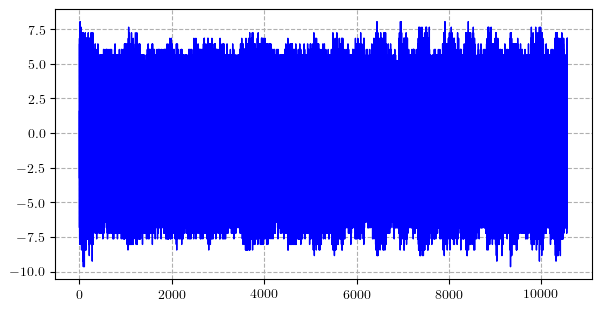

In [9]:
fast_out_edited = fast_out.drop(index=range(147115,151196))
time_edited = np.delete(time,range(147115,151196))
plt.plot(time_edited, fast_out_edited, color = 'blue', label='Fast Out')

In [10]:
fast_out

0         -3.216080
1         -1.206030
2         -2.010050
3          1.608040
4          0.402010
             ...   
1320450   -3.216080
1320451    2.010050
1320452    2.412060
1320453   -1.206030
1320454    6.834171
Name: 3, Length: 1320455, dtype: float64

Indices where fast_out has values more than 10: Index([147115, 147116, 147117, 147118, 147119, 147120, 147121, 147122, 147123,
       147124,
       ...
       147457, 147458, 147459, 147460, 147461, 147462, 150992, 150993, 151193,
       151194],
      dtype='int64', length=352)


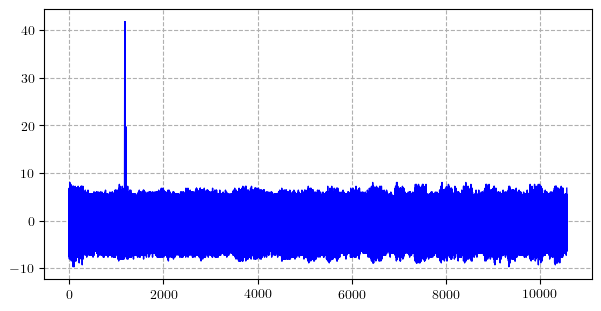

In [11]:
plt.plot(time, fast_out, color = 'blue', label='Fast Out')

# Identify where fast_out has values more than 10
high_fast_out_indices = fast_out[fast_out > 10].index
print("Indices where fast_out has values more than 10:", high_fast_out_indices)

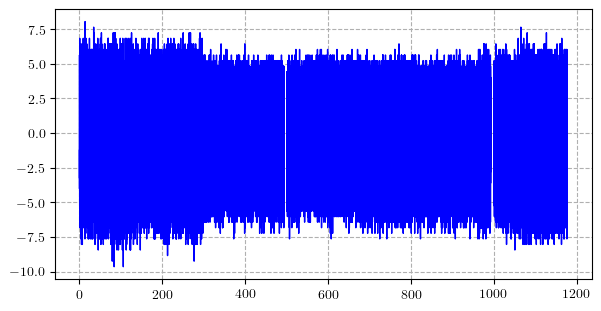

In [12]:
plt.plot(time[:147115], fast_out[:147115], color = 'blue', label='Fast Out')

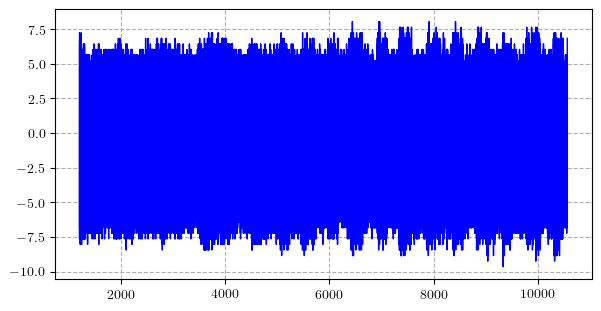

In [13]:
plt.plot(time[151196:], fast_out[151196:], color = 'blue', label='Fast Out')

# Error Signal Allan Deviation

In [14]:
transmission_photodiode = combined_df.iloc[:,1].astype(float)[:1320455]
error_signal = combined_df.iloc[:,2].astype(float)[:1320455]
fast_out = combined_df.iloc[:,3].astype(float)[:1320455]
slow_out = combined_df.iloc[:,4].astype(float)[:1320455]
time = np.arange(0, len(transmission_photodiode)*0.008, 0.008)[:1320455]

fast_out_edited = fast_out.drop(index=range(147115,151196))
slow_out_edited = slow_out.drop(index=range(147115,151196))
error_signal_edited = error_signal.drop(index=range(147115,151196))
transmission_photodiode_edited = transmission_photodiode.drop(index=range(147115,151196))
time_edited = np.delete(time,range(147115,151196))

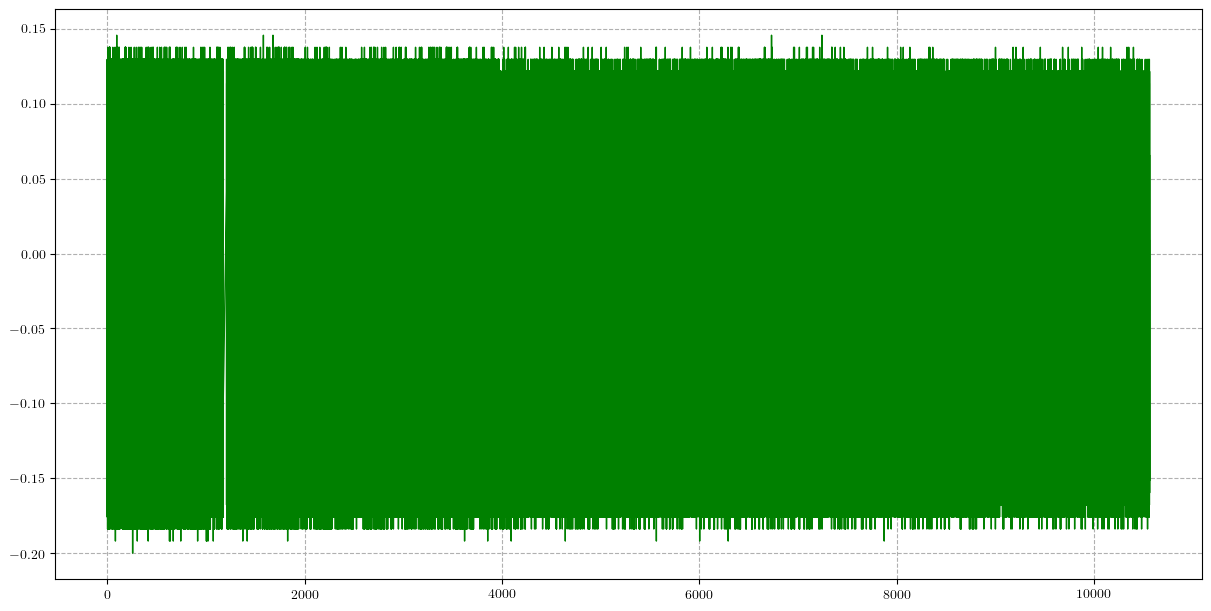

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(time_edited, error_signal_edited, color = 'green', label='Error Signal')

In [16]:
error_signal_edited*1000 # Convert to mV

0           17.085
1           89.447
2           73.367
3         -159.799
4          113.568
            ...   
1320450   -135.678
1320451    -63.317
1320452   -159.799
1320453    121.608
1320454     65.327
Name: 2, Length: 1316374, dtype: float64

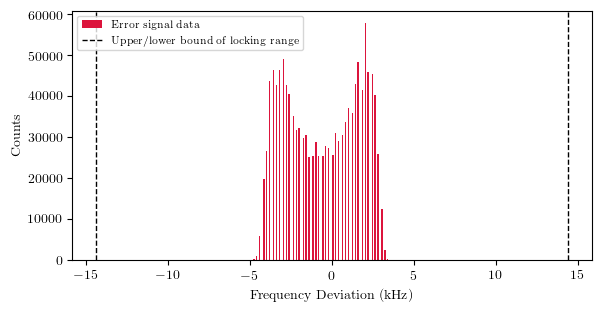

In [17]:
calibration_conversion_factor = 0.0402576 #mV/Hz
frequency_variation = error_signal_edited*1000/calibration_conversion_factor
frequency_variation
plt.hist(frequency_variation/1000, bins=100,color='crimson',label='Error signal data')
plt.axvline(x = 14.4, color = 'black', linestyle = '--', label = "Upper/lower bound of locking range")
plt.axvline(x = -14.4, color = 'black', linestyle = '--')
plt.xlabel('Frequency Deviation (kHz)')
plt.ylabel('Counts')
# plt.title('Frequency Deviation Histogram')
plt.legend()
plt.grid(False)
# plt.tight_layout()
# plt.savefig('250520 PDHLockThreeHoursFrequencyDeviationHistogramWLockingRange.pdf',dpi=300)

#### Two column plot

In [18]:
# repeat the same but this time for two column plot for with and without locking range

# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

Text(0.5, 0.01, 'Frequency Deviation (kHz)')

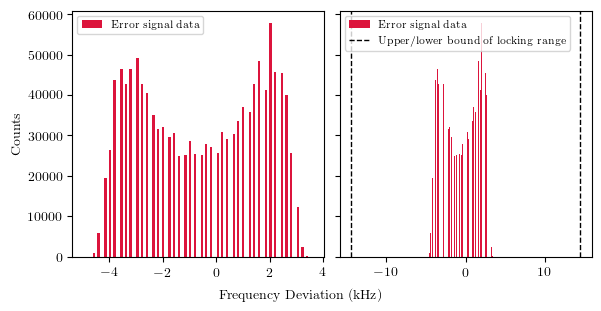

In [19]:
# repeat the same but this time for two column plot for with and without locking range

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)

ax1.hist(frequency_variation/1000, bins=100,color='crimson',label='Error signal data')
# ax1.set_xlabel('Frequency Deviation (kHz)')
ax1.set_ylabel('Counts')
# plt.title('Frequency Deviation Histogram')
ax1.legend()
ax1.grid(False)

calibration_conversion_factor = 0.0402576 #mV/Hz
frequency_variation = error_signal_edited*1000/calibration_conversion_factor
frequency_variation
ax2.hist(frequency_variation/1000, bins=100,color='crimson',label='Error signal data')
ax2.axvline(x = 14.4, color = 'black', linestyle = '--', label = "Upper/lower bound of locking range")
ax2.axvline(x = -14.4, color = 'black', linestyle = '--')
# ax2.set_xlabel('Frequency Deviation (kHz)')
# plt.title('Frequency Deviation Histogram')
ax2.legend()
ax2.grid(False)

fig.supxlabel('Frequency Deviation (kHz)',fontsize=10)
# plt.tight_layout()
# plt.savefig('250520 TwoColumnPDHLockThreeHoursFrequencyDeviationHistogramWLockingRange.pdf',dpi=300)

# 250604 No locking range just the normal plot

# Nice latex font for one column

In [20]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

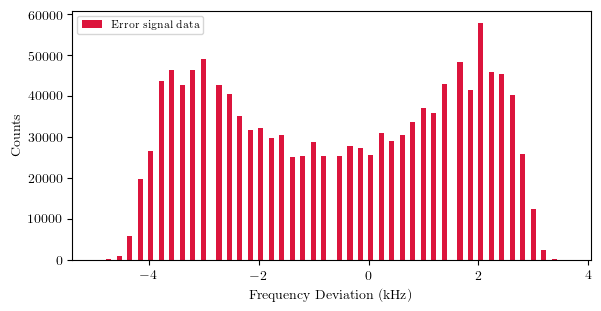

In [44]:
plt.hist(frequency_variation/1000, bins=90,color='crimson',label='Error signal data')
# ax1.set_xlabel('Frequency Deviation (kHz)')
plt.ylabel('Counts')
plt.xlabel('Frequency Deviation (kHz)')
# plt.title('Frequency Deviation Histogram')
plt.legend()
plt.grid(False)
plt.savefig('250604 PDHLockThreeHoursFrequencyDeviationHistogramWithoutLockingRange.pdf',dpi=300)

In [ ]:
# # Export the data frequency_variation to a txt file for STABLE32

# np.savetxt('ErrorSignalConvertedToFrequencyHz.txt', frequency_variation)

In [ ]:
# frequency_variation

0           424.391916
1          2221.866182
2          1822.438496
3         -3969.411987
4          2821.032550
              ...     
1320450   -3370.245618
1320451   -1572.796193
1320452   -3969.411987
1320453    3020.746393
1320454    1622.724653
Name: 2, Length: 1316374, dtype: float64